# Exploratory Data Analysis (EDA)

## Objectives:

1. Sample and feature descriptions
2. Identify data shape, distribution, and spread
3. correlation
4. Discover outliers


In [2]:
# Load Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load Dataset
data = pd.read_csv('kickstarter_projects.csv')
df = pd.DataFrame(data = data)
df.round(decimals=0)
# Quick look into kickstarter_projects columns
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


## Description of columns (provided by datasource)

1. ID: Internal kickstarter id
2.  Name: Name of the project
3. Category: Project category
4. Subcategory: Project subcategory
5. Country: Country the project is from
6. Launched: Date the project was launched
7. Deadline: Deadline date for crowdfunding
8. Goal: Amount of money the creator needs to complete the project (USD)
9. Pledged: Amount of money pledged by the crowd (USD)
10. Backers: Number of backers
11. State: Current condition the project is in (as of 2018-01-02)

In [3]:
# Understanding 'State' of projects
# replace 'Failed' with 0 & 'Successful' with 1
df.State = df.State.replace({'Failed':0 ,
                             'Successful': 1})
df = df[df["State"] != 'Live']
df = df[df["State"] != 'Canceled']
df = df[df["State"] != 'Suspended']

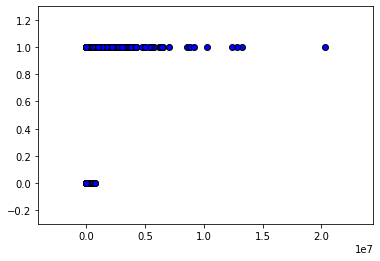

In [53]:
df['State'].astype(int)
y = df['State']
x = df['Pledged']
plt.margins(.2,.3)
scat = plt.scatter(x = x, y = y, c = 'Blue', edgecolors='black')

#### Aggregation Statistics

In [5]:
# Create separate dataframes
Failed = df[df["State"] != 1]
Success = df[df["State"] != 0]


display('Failure Aggragation')
display(Failed.agg(
    {
        "Goal": ['mean',"max"],
        "Pledged": ['mean',"max"],
        "Backers" :['mean',"max"],
    }
).round())
display('Success Aggragation')
display(Success.agg(
    {
        "Goal": ['mean',"max"],
        "Pledged": ['mean',"max"],
        "Backers" :['mean',"max"],
    }
).round())

'Failure Aggragation'

,Goal,Pledged,Backers
mean,63189.0,1321.0,16.0
max,166361391.0,757353.0,6550.0


'Success Aggragation'

,Goal,Pledged,Backers
mean,9536.0,22664.0,264.0
max,2015609.0,20338986.0,219382.0


#### 'Pledged' and 'Backers' both contain a correlation between the success of a project. Failed projects had significantly less number of pledgers and backers compared to successful projects

#### Surprisingly, successful projects had a mean goal much less than failed projects. This may be due to Initial investors viewing a lower goal as less risk, attracting to more a broader view of potential investors. A smaller investing amount with be more impactful, than the same amount with a larger reach goal.

#### Deploy Logistic Regression model to predict potential success of a kickstarted project

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_data = df[['Goal','Pledged', 'Backers', 'State']]

y_data = model_data['State'] 
y_data = y_data.astype('int')
x_data = model_data.drop('State', axis = 1)

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

#Create and Train model
model = LogisticRegression(class_weight = 'balanced')
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

display(print(classification_report(y_test_data, predictions)))
display(print(confusion_matrix(y_test_data,predictions)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59352
           1       1.00      1.00      1.00     40087

    accuracy                           1.00     99439
   macro avg       1.00      1.00      1.00     99439
weighted avg       1.00      1.00      1.00     99439



None

[[59212   140]
 [    0 40087]]


None